In [26]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [27]:
#loadind the dataset
df1=pd.read_csv(r"C:\Users\toshiba\Downloads\Heart_Disease.csv")


In [28]:
#Analyzing Data Disturbution
#Exploratory Data Analysis
#print(df1.describe())
print(df1.dtypes)

#dropping the NA values
df1.isnull().sum()
df=df1.dropna()


######################Heart desease is a catagory


male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
Heart Disease        int64
dtype: object


In [29]:
#loading the X and Y data
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]   ##----------------------------> int or catagory
#Data Processing

print(X.shape,Y.shape)


(3658, 15) (3658,)


In [30]:
#Feature Engineering
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions  
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X)

from sklearn.preprocessing import StandardScaler
Standard_scaler = StandardScaler().fit(X)
Re_X = Standard_scaler.transform(rescaledX)


In [31]:
#Feature Selection
#selecting univariant feature selection
#selecting the best columns
#selecting columns using SelectKBest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
test = SelectKBest(score_func=chi2, k=12)   ###-----------------> why 12 ?

fit = test.fit(X, Y)
print(fit.scores_)
features = fit.transform(X) 
print(features[0:12,:])

[ 17.10775088 296.20034419   7.73328653   0.68647384 155.7983075
  28.19156867   8.5078328   82.84545536  31.06762071 250.49020507
 669.13602117 142.52181427  15.78543627   2.91728745 379.91423514]
[[  1.    39.     0.     0.     0.     0.     0.   195.   106.    70.
   26.97  77.  ]
 [  0.    46.     0.     0.     0.     0.     0.   250.   121.    81.
   28.73  76.  ]
 [  1.    48.    20.     0.     0.     0.     0.   245.   127.5   80.
   25.34  70.  ]
 [  0.    61.    30.     0.     0.     1.     0.   225.   150.    95.
   28.58 103.  ]
 [  0.    46.    23.     0.     0.     0.     0.   285.   130.    84.
   23.1   85.  ]
 [  0.    43.     0.     0.     0.     1.     0.   228.   180.   110.
   30.3   99.  ]
 [  0.    63.     0.     0.     0.     0.     0.   205.   138.    71.
   33.11  85.  ]
 [  0.    45.    20.     0.     0.     0.     0.   313.   100.    71.
   21.68  78.  ]
 [  1.    52.     0.     0.     0.     1.     0.   260.   141.5   89.
   26.36  79.  ]
 [  1.    43.    30

In [32]:
#selecting columns using Recursive Feature Selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 12)
fit = rfe.fit(X, Y)
print("Num Features:",fit.n_features_)
print("Selected Features:", fit.support_)
print("Feature Ranking:", fit.ranking_)

Num Features: 12
Selected Features: [ True  True  True  True  True  True  True  True  True False False  True
  True  True False]
Feature Ranking: [1 1 1 1 1 1 1 1 1 4 2 1 1 1 3]


In [33]:
#selecting columns using ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
model_tree = RandomForestClassifier(random_state=0, n_estimators=50)
sel_rfe_tree = RFE(estimator=model_tree, n_features_to_select=10, step=1)
X_train_rfe_tree = sel_rfe_tree.fit_transform(X,Y)
print(sel_rfe_tree.get_support())

[ True  True  True False  True False False False False  True  True  True
  True  True  True]


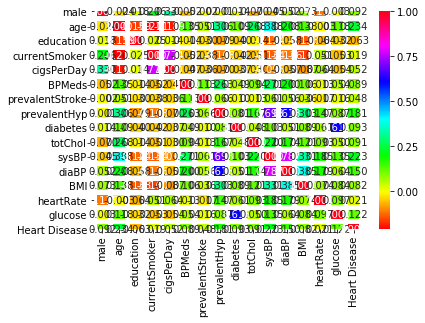

In [34]:
#checking correlation between columns

#print(df.corr())
sns.heatmap(df.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=4)
plt.show()


In [35]:

#over sampling the data
from imblearn.under_sampling import NearMiss
nm=NearMiss()
X_train_nm,Y_train_nm=nm.fit_sample(Re_X,Y)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train_nm, Y_train_nm, test_size=0.30, random_state=0)

X_train_nm,Y_train_nm=nm.fit_sample(X_train,Y_train)

In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test, Y_pred)
print('confusion matrix of logistic Regression')
print(matrix)
from sklearn.metrics import accuracy_score
matrix2 = accuracy_score(Y_test,Y_pred)
print('Accuracy of logistic Regression', matrix2)

confusion matrix of logistic Regression
[[118  32]
 [ 68 117]]
Accuracy of logistic Regression 0.7014925373134329


In [39]:
#Using KFold 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 10
seed = 2

kfold = KFold(n_splits=num_folds, random_state=seed)
model1 = LogisticRegression()
results1 = cross_val_score(model1,Re_X, Y, cv=kfold)

print('Accuracy of logistic regression using KFold', results1*100.0)
print(results1.mean()*100.0, results1.std()*100.0)


Accuracy of logistic regression using KFold [81.96721311 84.9726776  84.9726776  88.25136612 84.15300546 85.24590164
 84.42622951 86.61202186 85.20547945 84.10958904]
84.99161613893256 1.5591894036131095


In [40]:
#Using Navies Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print('confusion matrix using navies bayes',cm)
from sklearn.metrics import accuracy_score
nav=accuracy_score(Y_test, Y_pred)
print('accuracy by navies bayes',nav)

confusion matrix using navies bayes [[150   0]
 [157  28]]
accuracy by navies bayes 0.5313432835820896


In [41]:
num_folds = 8
seed = 4

kfold = KFold(n_splits=num_folds, random_state=seed)
model1 = GaussianNB()
nav1 = cross_val_score(model1,Re_X, Y, cv=kfold)

print('Accuracy of Navies Bayes using KFold', nav1*100.0)
print(nav1.mean()*100.0, nav1.std()*100.0)
#Using K-Nearest Neighbour

Accuracy of Navies Bayes using KFold [79.25764192 81.22270742 85.12035011 82.05689278 82.9321663  82.71334792
 84.68271335 79.64989059]
82.20446379941329 1.9883364285749185


In [42]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)


from sklearn.metrics import confusion_matrix
knn = confusion_matrix(Y_test, Y_pred)
print('confusion matrix of knn',knn)
from sklearn.metrics import accuracy_score
knn_acc=accuracy_score(Y_test, Y_pred)
print('accuracy of knn',knn_acc)
num_folds = 12
seed = 3
kfold = KFold(n_splits=num_folds, random_state=seed)
model1 = KNeighborsClassifier()
knn_kFold = cross_val_score(model1,Re_X, Y, cv=kfold)
print('Accuracy of KNN using KFold', knn_kFold*100.0)
print(knn_kFold.mean()*100.0, knn_kFold.std()*100.0)

confusion matrix of knn [[128  22]
 [ 76 109]]
accuracy of knn 0.7074626865671642
Accuracy of KNN using KFold [79.67213115 84.59016393 80.6557377  83.60655738 87.54098361 82.62295082
 83.93442623 83.27868852 84.91803279 82.62295082 82.23684211 83.55263158]
83.26934138625253 1.936892226630354


In [44]:
# Using Support Vector Machines

from sklearn.svm import SVC
svc=SVC(kernel='linear',random_state=0)
from sklearn.model_selection import GridSearchCV   ##----------------------------> Why gridsearch?
svc = SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
max_iter=-1, probability=False, random_state=0, shrinking=True,
tol=0.001, verbose=False)

svc.fit(X_train,Y_train)
svc_pred= svc.predict(X_test)

from sklearn.metrics import confusion_matrix
svc_con = confusion_matrix(Y_test, svc_pred)
print('confusion matrix of Support Vector machine',svc_con)
from sklearn.metrics import accuracy_score
svc_acc=accuracy_score(Y_test, svc_pred)
print('accuracy of Support Vector machine',svc_acc) 

from sklearn.metrics import classification_report

report_svc = classification_report(Y_test, svc_pred)
print(report_svc) 


confusion matrix of Support Vector machine [[142   8]
 [ 88  97]]
accuracy of Support Vector machine 0.7134328358208956
              precision    recall  f1-score   support

           0       0.62      0.95      0.75       150
           1       0.92      0.52      0.67       185

    accuracy                           0.71       335
   macro avg       0.77      0.74      0.71       335
weighted avg       0.79      0.71      0.70       335



In [45]:
#Using RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0) # Number of tree in forest
classifier.fit(X_train, Y_train)

# Predicting the Test set results
rd_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
rd_cm = confusion_matrix(Y_test, rd_pred)
print('random forest cm',rd_cm)
from sklearn.metrics import accuracy_score
print('random forest accuracy',accuracy_score(Y_test, rd_pred))

rd_report = classification_report(Y_test, rd_pred)
print(rd_report) 

random forest cm [[117  33]
 [ 68 117]]
random forest accuracy 0.6985074626865672
              precision    recall  f1-score   support

           0       0.63      0.78      0.70       150
           1       0.78      0.63      0.70       185

    accuracy                           0.70       335
   macro avg       0.71      0.71      0.70       335
weighted avg       0.71      0.70      0.70       335



In [46]:

#using XGBoostS
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, Y_train)

# Predicting the Test set results
xg_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
xg_cm = confusion_matrix(Y_test, xg_pred)
print('xgboost confusion matrix',xg_cm)
from sklearn.metrics import accuracy_score
print('accuracy using xgboost', accuracy_score(Y_test, xg_pred))
from sklearn.metrics import classification_report

report = classification_report(Y_test, xg_pred)
print(report) 
from sklearn.model_selection import LeaveOneOut
loocv = LeaveOneOut()
xg_leave_model = XGBClassifier()

# Fitting the model and Extracting the results
xg_Leave= cross_val_score(xg_leave_model, Re_X, Y, cv=loocv)
xg_leave_report=classification_report(Y_test, xg_pred)
print('Accuracy using Xgboost leave out method',xg_leave_report)


xgboost confusion matrix [[116  34]
 [ 55 130]]
accuracy using xgboost 0.7343283582089553
              precision    recall  f1-score   support

           0       0.68      0.77      0.72       150
           1       0.79      0.70      0.74       185

    accuracy                           0.73       335
   macro avg       0.74      0.74      0.73       335
weighted avg       0.74      0.73      0.74       335



KeyboardInterrupt: 